# Load the customer data

In [ ]:
import pandas as pd
customer_data = pd.read_csv('/content/Mall_Customers.csv')


#Data Cleaning

In [ ]:
# Check for missing values
print(customer_data.isnull().sum())

# Drop rows with missing values if any
customer_data.dropna(inplace=True)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#Feature Engineering

In [ ]:
# Encode categorical variables
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

#Exploratory Data Analysis (EDA)

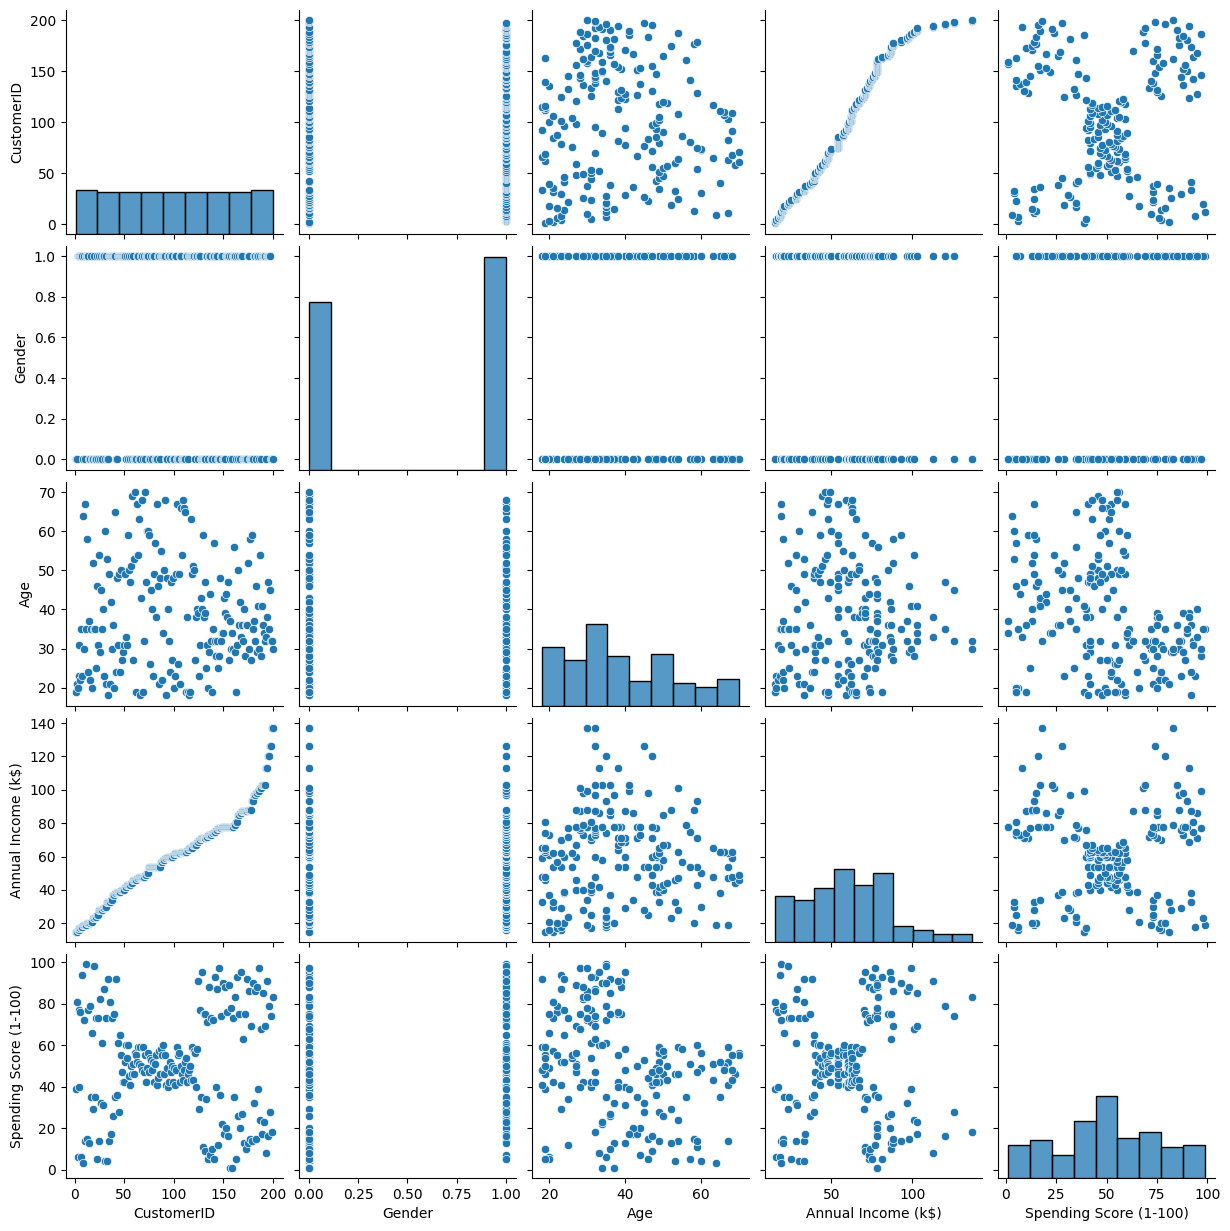

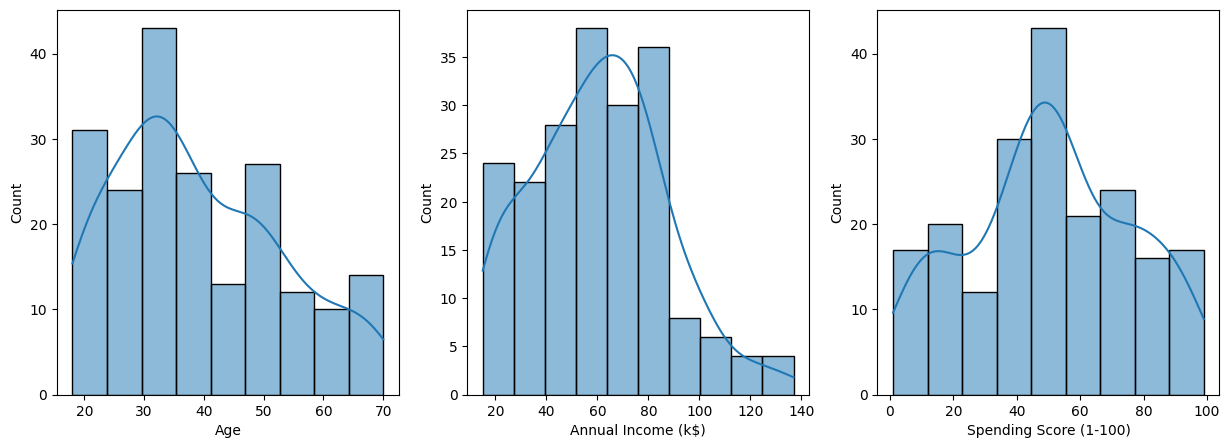

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Pairplot to visualize the relationships between features
sns.pairplot(customer_data)
plt.show()

# Distribution of Age, Income, and Spending Score
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(customer_data['Age'], kde=True, ax=ax[0])
sns.histplot(customer_data['Annual Income (k$)'], kde=True, ax=ax[1])
sns.histplot(customer_data['Spending Score (1-100)'], kde=True, ax=ax[2])
plt.show()


#Clustering

#Choosing the Number of Clusters

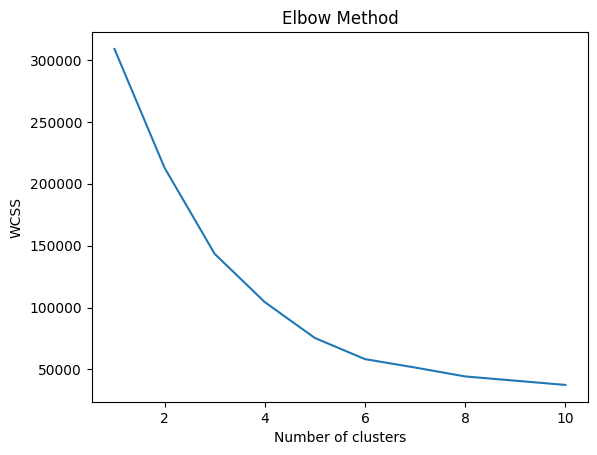

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
wcss = []
X = customer_data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#K-Means Clustering

In [ ]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 5  # Assume the elbow method suggests 5 clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)


#Cluster Analysis

In [ ]:
# Analyze the characteristics of each cluster
cluster_analysis = customer_data.groupby('Cluster').mean()
print(cluster_analysis)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         23.000000  0.608696  45.217391           26.304348   
1        162.000000  0.538462  32.692308           86.538462   
2        162.945946  0.486486  40.324324           87.432432   
3         85.012658  0.582278  43.126582           54.822785   
4         23.090909  0.590909  25.272727           25.727273   

         Spending Score (1-100)  
Cluster                          
0                     20.913043  
1                     82.128205  
2                     18.189189  
3                     49.835443  
4                     79.363636  


#Label Clusters

In [ ]:
# Define cluster labels based on analysis
cluster_labels = {
    0: 'Low income, low spending',
    1: 'High income, high spending',
    2: 'Medium income, medium spending',
    3: 'Low income, high spending',
    4: 'High income, low spending'
}


In [ ]:
# Map the cluster labels
customer_data['Cluster Label'] = customer_data['Cluster'].map(cluster_labels)


#Visualize Labeled Clusters

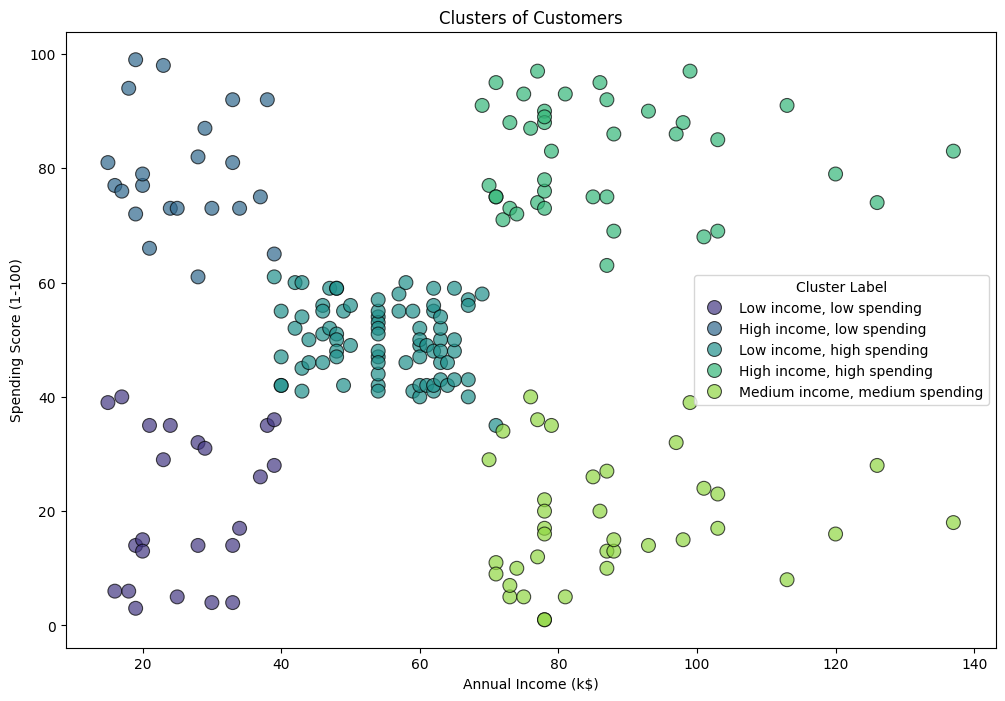

In [ ]:
# Visualize the labeled clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label', palette='viridis', data=customer_data, s=100, alpha=0.7, edgecolor='k')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()
